# OpenCV Introduction

In this notebook, we will cover how to use OpenCV to load and manipulate images. 

### Part 0: Setting up OpenCV

Run the following from the project's <b>root directory</b>. This should be `TUMO-comp-photo/`.

1. Setting up a Python environment for this class!

```bash
python3 -m venv photo
source photo/bin/activate
```

2. Installing packages that we'll need!

```bash
pip3 install --upgrade pip
pip3 install opencv-python
pip3 install numpy
pip3 install matplotlib
pip3 install jupyter

pip3 freeze > requirements.txt
```

### Part 1: Loading JPEG Images

In [1]:
# Set the image file name
mountain = 'images/mountain.jpg'

# Load the image using OpenCV
# cv2.imread loads the image from the file

import cv2
mountain_image = cv2.imread(mountain)

# now write the image to a file with a new name
cv2.imwrite('images/mountain_copy.jpg', mountain_image)


True

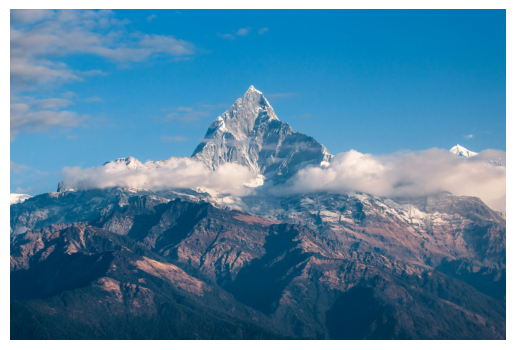

In [2]:
import matplotlib.pyplot as plt

# Convert image from BGR (OpenCV default) to RGB for proper display
mountain_image_rgb = cv2.cvtColor(mountain_image, cv2.COLOR_BGR2RGB)

plt.imshow(mountain_image_rgb)
plt.axis('off')  # Hide axis ticks and labels
plt.show()


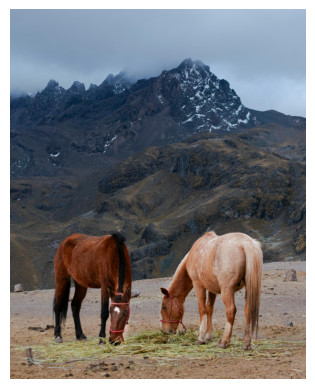

In [3]:
# Your turn: pick a different image from the images folder and load it, then write it to a new name!

# Your code here:
horses = 'images/horses.jpg'
horses_image = cv2.imread(horses)

horses_image_rgb = cv2.cvtColor(horses_image, cv2.COLOR_BGR2RGB)

cv2 .imwrite('images/horses_copy.jpg', horses_image)
plt.imshow(horses_image_rgb)
plt.axis('off')  
plt.show()

### Part 2: Images as Arrays

Image shape: (3248, 4872, 3)
Pixel at (100, 200): [181 156 130]


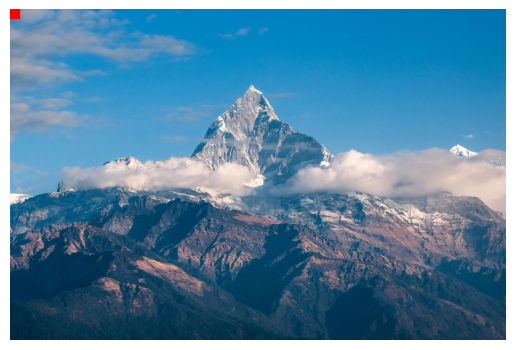

In [4]:
# Load the image and treat it as a NumPy array!


import numpy as np

# Check image shape (height, width, channels)
print("Image shape:", mountain_image.shape)

# Let's access the pixel at row 100, column 200 (BGR format)
pixel = mountain_image[100, 200]
print("Pixel at (100, 200):", pixel)

# Let's set the top-left 100x100 pixels to pure red (BGR: [0,0,255])
mountain_image[0:100, 0:100] = [0, 0, 255]

# Display the manipulated image (converted to RGB for plt)
plt.imshow(cv2.cvtColor(mountain_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Challenge 1: Add a border to your image!

Go here: https://wamingo.net/rgbbgr/

Pick a color and add a border to the image you chose. Remember that we are working with BGR images! 

<i>Optional: You can convert your image to an RGB image first and then use RGB values!</i>

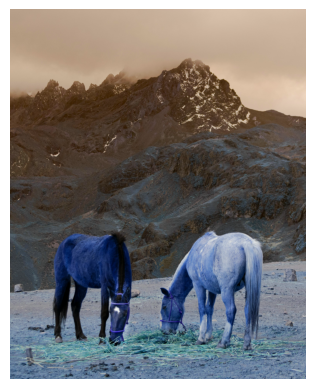

In [10]:
# Challenge 1: Add a border to your image!

# Your code here:
border_size = 50  
border_color =  [255, 0, 0]

bordered_image = cv2.copyMakeBorder(
    horses_image,
    top=border_size,
    bottom=border_size,
    left=border_size,
    right=border_size,
    borderType=cv2.BORDER_CONSTANT,
    value=border_color
)
plt.imshow(horses_image)
plt.axis('off')  
plt.show()

### Part 3: Image Color Adjustments

Here, we'll learn to adjust image brightness, contrast, and convert to greyscale!

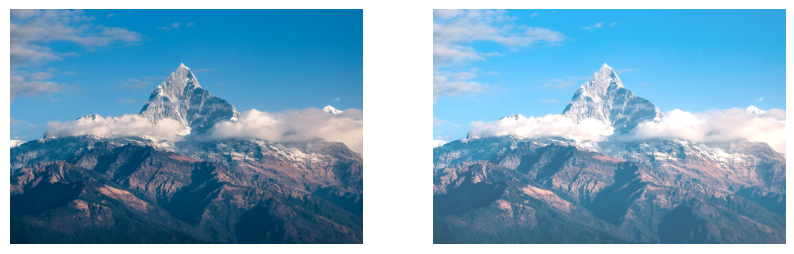

In [ ]:
# Let's work with the mountain image!
import cv2
import numpy as np
import matplotlib.pyplot as plt

# To prevent wrapping around, convert to a higher data type before adding 
mountain_image = cv2.imread('images/mountain.jpg')
mountain_image = mountain_image.astype(np.int16)

# Let's increase the brightness by 50
mountain_image_brighter = mountain_image + 50
mountain_image_brighter = np.clip(mountain_image_brighter, 0, 255).astype(np.uint8) # need to clip the value

# Display original and brighter images side by side

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(mountain_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(mountain_image_brighter, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
plt.show() 



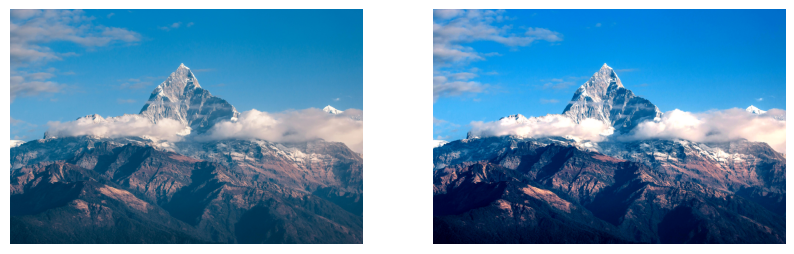

In [12]:
# Let's increase the contrast of the image by 1.5
mountain_image_contrast = mountain_image.copy().astype(np.float32)
mountain_image_contrast = (mountain_image_contrast - 128) * 1.5 + 128
mountain_image_contrast = np.clip(mountain_image_contrast, 0, 255).astype(np.uint8) # need to clip the value

# Display original and contrast images side by side

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(mountain_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(mountain_image_contrast, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
plt.show()

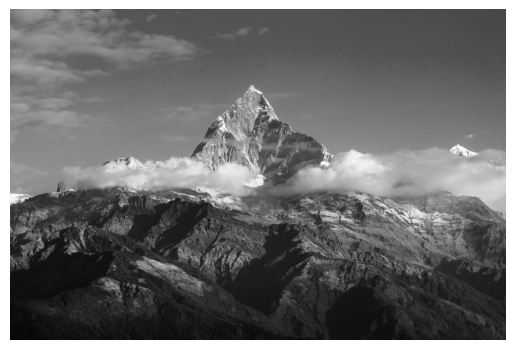

In [13]:
# Let's convert the image to greyscale using the formula: 0.299*R + 0.587*G + 0.114*B
mountain_image = cv2.imread('images/mountain.jpg')

greyscale_image = np.dot(mountain_image[..., :], [0.114, 0.587, 0.299])

# Display the greyscale image
plt.imshow(greyscale_image, cmap='gray')
plt.axis('off')
plt.show()



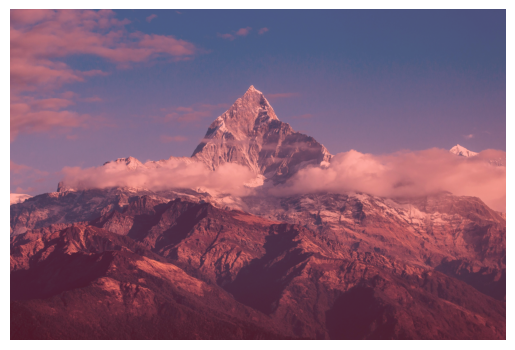

In [14]:
# More custom edits!

# Ex) Make the image more red!
mountain_image = cv2.imread('images/mountain.jpg')
mountain_image_redder = mountain_image.copy().astype(float)

red = np.array([0, 0, 255])
# want to make the image redder by averaging with the red channel

tint_weight = 0.3
mountain_image_redder = (1 - tint_weight) * mountain_image_redder + tint_weight * red

# Optional: Rescale each pixel so its brightness matches that of the pixel in the original image by using greyscale_image
# original_greyscale = np.dot(mountain_image[...,:3], [0.114, 0.587, 0.299])
# redder_greyscale = np.dot(mountain_image_redder[...,:3], [0.114, 0.587, 0.299])
# scale = np.ones_like(redder_greyscale)
# mask = redder_greyscale > 0
# scale[mask] = original_greyscale[mask] / redder_greyscale[mask]
# mountain_image_redder = mountain_image_redder * scale[..., np.newaxis]

mountain_image_redder = np.clip(mountain_image_redder, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(mountain_image_redder, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Challenge 2: Implement a duotone image!

<b>What is duotone?</b>

A duotone uses 2 colors, and lets one color represent the darker colors and one color represent the lighter colors. Here's an example for the mountain image!

<img src="./images/lessons_files/mountain_red_blue_duotone.png" alt="Duotone image" width="500">

<b>Implementation hints</b>
1. Pick your two colors from https://wamingo.net/rgbbgr/ (we recommend you choose 1 darker shade for your shadows and one lighter shade for your highlights)
2. Use the greyscale of the image to measure intensity
3. Use the intensity to choose the right color (we have provided some hints below!)

In [16]:
# Challenge 2: Implement a duotone image code on an image of your choice!

# Help for part 3 (described above)
# Intensity is the greyscale value of the image. You want darker colors (closer to 0) to be your
# dark color and lighter colors (closer to 255) to be your light color. 
def duotone_helper(greyscale_image, dark_color, light_color):
    """
    This helper function takes in a greyscale image and two colors. Returns the color
    given by the greyscale value for duotone image.
    Parameters:
        greyscale_image: np.ndarray
            The greyscale image of the pixel.
        dark_color: tuple
            The color of the dark shade.
        light_color: tuple
            The color of the light shade.
    """
    # normalize the greyscale image to [0, 1]
    greyscale_norm = greyscale_image.astype(np.float32) / 255.0
    greyscale_norm = greyscale_norm[..., np.newaxis]
    
    # you can think of greyscale_norm as a percentage of the image that should be the light color
    # YOUR TURN: Implement the duotone formula!
    duotone_image = horses_image # edit this line!
    return duotone_image

# Your code here:
dark_color = "#000000"
light_color = "#f6ff00"


greyscale_image = np.dot(horses_image[..., :], [0.114, 0.587, 0.299])

### Part 4: Image Shape Adjustments

Here, we'll learn how to crop images!

In [ ]:
# Let's crop the image!
mountain_image = mountain_image.astype(np.uint8)
# 1. Crop just the left half of the image
left_half = mountain_image[:, :mountain_image.shape[1] // 2]

# 2. Crop just the right half of the image
right_half = mountain_image[:, mountain_image.shape[1] // 2:]

# 3. Crop the top 3/4 of the image
top_three_quarters = mountain_image[:(3 * mountain_image.shape[0]) // 4, :]

# Show the crops using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(left_half, cv2.COLOR_BGR2RGB))
axes[0].set_title('Left Half')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(right_half, cv2.COLOR_BGR2RGB))
axes[1].set_title('Right Half')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(top_three_quarters, cv2.COLOR_BGR2RGB))
axes[2].set_title('Top 3/4')
axes[2].axis('off')

plt.show()


In [ ]:
# Mini-challenge: Reshuffle the image! Split the image into 4 quadrants and then rearrange them to form a new image!
# 2 useful functions: np.hstack and np.vstack (search up documentation online if you need a reference!)

image = # load your image

# Your code here:
reshuffled_image = None 

# Show the new image
plt.imshow(cv2.cvtColor(reshuffled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Your next task:

#### Task 1: Go to tasks/helper.py and fill in the functions. 

#### Task 2: Choose an image of your choice and use what you've learned to edit it. Be creative!